## Import dependencies

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten
import os
from PIL import Image

In [ ]:
from google.colab import files
from zipfile import ZipFile

with ZipFile(files.upload(), 'r') as zip:
  zip.extractall()
  print('Done')

In [ ]:
!unzip /content/archive.zip

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

## É preciso importar as imagens

In [5]:
print(os.getcwd())
for file in os.listdir(os.getcwd()):
  print(file)

/content
.config
drive
sample_data


In [6]:
#this works as long as it is inside code/
print(os.getcwd())
#initial_path = os.getcwd()
initial_path = "/content/drive/MyDrive"
train_path = initial_path + "/archive/train/"
test_path = initial_path + "/archive/test/"

images = []
labels = []
images_test = []
labels_test = []

for label in range(0, 43):
    full_path = train_path + str(label) + "/"
    for file in os.listdir(full_path):
        img = Image.open(full_path + file)
        #needs to resize
        img = img.resize((30, 30)) 
        img = img.convert('L')

        numpydata = np.asarray(img)
        images.append(numpydata)
        labels.append(label)

#print(X_Images.shape, y_Labels.shape)
   

/content


In [7]:
with open(initial_path + "/archive/Test.csv") as file:
  for image_metadata in file:
    if image_metadata.startswith("Width"):
      continue
    metadata = image_metadata.strip().split(",")
    img = Image.open(test_path + metadata[7][5:])
    img = img.resize((30, 30))
    img = img.convert('L')
    numpydata = np.asarray(img)
    images_test.append(numpydata)
    labels_test.append(int(metadata[6]))

X_Images = np.array(images)
y_Labels = np.array(labels)
X_Images_test = np.array(images_test)
y_Labels_test = np.array(labels_test)
print(X_Images.shape, y_Labels.shape)

(39230, 30, 30) (39230,)


In [8]:
y_Labels = y_Labels.reshape(-1, 1)
print(y_Labels.shape)
y_Labels_test = y_Labels_test.reshape(-1, 1)
print(y_Labels_test.shape)

(39230, 1)
(12630, 1)


### One hot encoder é passar de números para binário 

In [9]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()
y = ohe.fit_transform(y_Labels).toarray()
y_test_ohe = ohe.fit_transform(y_Labels_test).toarray()
print(y.shape, y_test_ohe.shape)

(39230, 43) (12630, 43)


## Split into train and validation

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_validation, y_train, y_validation = train_test_split(X_Images, y, test_size = 0.2)
X_train = X_train/255 
X_validation = X_validation/255
X_test = X_Images_test/255
print(X_train.shape, y_train.shape)

(31384, 30, 30) (31384, 43)


## Construindo a rede

In [ ]:
def NNmodel(hidedenlayer, lr):
  model = Sequential()
  model.add(Flatten(input_shape=(30, 30)))
  #model.add(Dense(800, activation='relu'))
  #model.add(Dense(hidedenlayer, activation='relu', kernel_regularizer=keras.regularizers.l1_l2(l1=0.0001, l2=0.001)))
  model.add(Dense(hidedenlayer, activation='relu'))
  model.add(Dense(43, activation='softmax'))

  opt = keras.optimizers.Adam(learning_rate=lr)
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

  history = model.fit(X_train, y_train, validation_data=(X_validation, y_validation), epochs=100, batch_size=128)
  return model, history

In [ ]:
history = []
for neurons in range(400, 1100, 100):
  m, h = NNmodel(neurons)
  history.append(h)

In [ ]:
historic = {"accuracy": [], "val_accuracy": [], "loss": [], "val_loss": []}
for i in history:
  historic["accuracy"].append(i.history["accuracy"][-1])
  historic["val_accuracy"].append(i.history["val_accuracy"][-1])
  historic["loss"].append(i.history["loss"][-1])
  historic["val_loss"].append(i.history["val_loss"][-1])

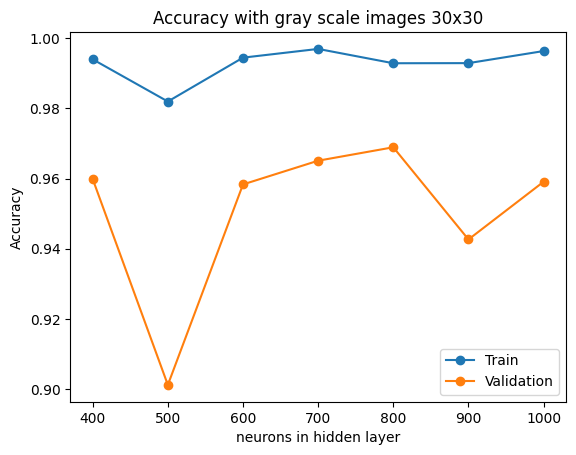

0.9969092607498169


In [ ]:
plt.plot(range(400, 1100, 100), historic['accuracy'], marker="o")
plt.plot(range(400, 1100, 100), historic['val_accuracy'], marker="o")
plt.title('Accuracy with gray scale images 30x30')
plt.ylabel('Accuracy')
plt.xlabel('neurons in hidden layer')
plt.xticks(range(400, 1100, 100))
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()
print(max(historic['accuracy']))

In [ ]:
m, historic_800 = NNmodel(800, 0.01)

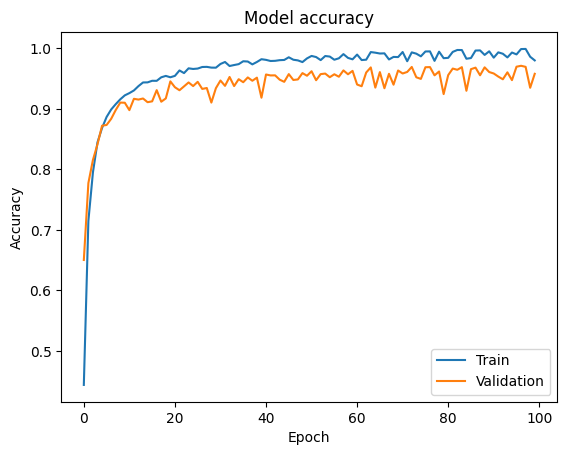

In [ ]:
plt.plot(historic_800.history['accuracy'])
plt.plot(historic_800.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
#plt.xticks(range(100, 1000, 100))
#plt.axis(range(100, 1000, 100), labels = False)
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

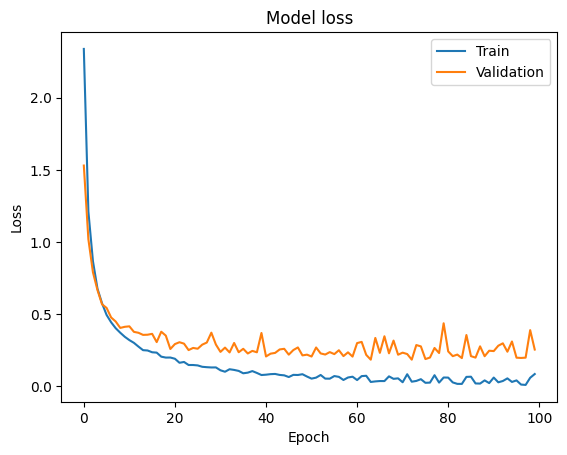

In [ ]:
plt.plot(historic_800.history['loss']) 
plt.plot(historic_800.history['val_loss']) 
plt.title('Model loss') 
plt.ylabel('Loss') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Validation'], loc='upper right') 
plt.show()

# Hyperparameters tunning




In [ ]:
def NNmodel_learning_rate(hidedenlayer, lr):
  model = Sequential()
  model.add(Flatten(input_shape=(30, 30)))
  model.add(Dense(hidedenlayer, activation='relu'))
  model.add(Dense(43, activation='softmax'))

  opt = keras.optimizers.Adam(learning_rate=lr)
  model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

  history = model.fit(X_train, y_train, validation_data=(X_validation, y_validation), epochs=100, batch_size=128)
  return model, history

In [ ]:
hist_lr = []
for lr in [0.1, 0.01, 0.005, 0.001, 0.0005, 0.0001]:
  m, historic_learning_rate = NNmodel_learning_rate(800, lr)
  hist_lr.append(historic_learning_rate)

In [ ]:
historic_lr = {"accuracy": [], "val_accuracy": [], "loss": [], "val_loss": []}
for i in hist_lr:
  historic_lr["accuracy"].append(i.history["accuracy"])
  historic_lr["val_accuracy"].append(i.history["val_accuracy"])
  historic_lr["loss"].append(i.history["loss"])
  historic_lr["val_loss"].append(i.history["val_loss"])

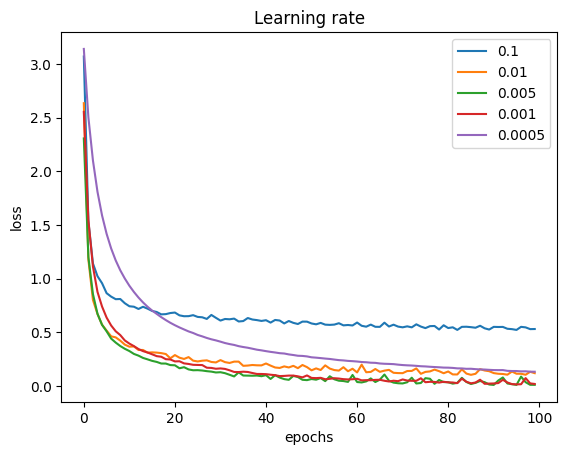

0.9969092607498169


In [ ]:
for i in historic_lr['loss'][1:]:
  plt.plot(i)
#for i in historic_lr:
#plt.plot(range(400, 1100, 100), historic['val_accuracy'], marker="o")
plt.title('Learning rate')
plt.ylabel('loss')
plt.xlabel('epochs')
#plt.xticks(range(400, 1100, 100))
plt.legend([0.1, 0.01, 0.005, 0.001, 0.0005, 0.0001], loc='upper right')
plt.show()

In [70]:
def NNmodel_regularization(l_1, l_2):
  model = Sequential()
  model.add(Flatten(input_shape=(30, 30)))
  model.add(Dense(800, activation='relu', kernel_regularizer=keras.regularizers.l1_l2(l1=l_1, l2=l_2)))
  model.add(Dense(43, activation='softmax'))

  opt = keras.optimizers.Adam(learning_rate=0.005)
  model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

  history = model.fit(X_train, y_train, validation_data=(X_validation, y_validation), epochs=100, batch_size=128)
  return model, history

In [ ]:
hist_reg = []
for l1 in [0.0001, 0.00001, 0.000001]:
  for l2 in [0.0001, 0.00001, 0.000001]:
    m, historic_regularization = NNmodel_regularization(l1, l2)
    hist_reg.append(historic_regularization)

In [60]:
historic_reg = {"accuracy": [], "val_accuracy": [], "loss": [], "val_loss": []}
for i in hist_reg:
  historic_reg["accuracy"].append(i.history["accuracy"])
  historic_reg["val_accuracy"].append(i.history["val_accuracy"])
  historic_reg["loss"].append(i.history["loss"])
  historic_reg["val_loss"].append(i.history["val_loss"])

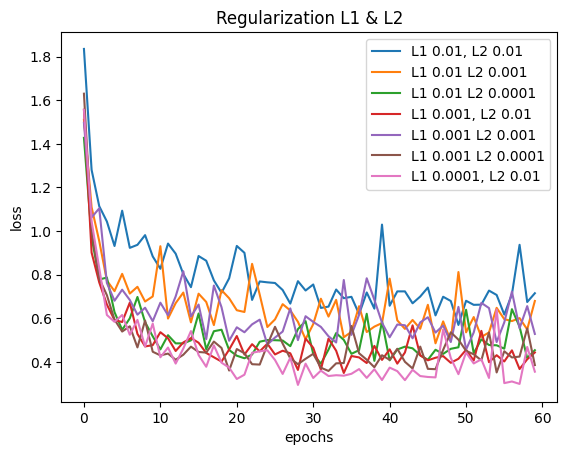

In [76]:
for i in historic_reg['val_loss'][2:]:
  plt.plot(i)
plt.title('Regularization L1 & L2')
plt.ylabel('loss')
plt.xlabel('epochs')
#plt.xticks(range(400, 1100, 100))
plt.legend(["L1 0.01, L2 0.01", "L1 0.01 L2 0.001", "L1 0.01 L2 0.0001", 
            "L1 0.001, L2 0.01", "L1 0.001 L2 0.001", "L1 0.001 L2 0.0001", 
            "L1 0.0001, L2 0.01", "L1 0.0001 L2 0.001", "L1 0.0001 L2 0.0001"], loc='upper right')
plt.show()

## Model Trained

In [82]:
def NN_final_model():
  model = Sequential()
  model.add(Flatten(input_shape=(30, 30)))
  model.add(Dense(800, activation='relu', kernel_regularizer=keras.regularizers.l1_l2(l1=0.000001, l2=0.000001)))
  model.add(Dense(43, activation='softmax'))

  opt = keras.optimizers.Adam(learning_rate=0.005)
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

  history = model.fit(X_train, y_train, validation_data=(X_validation, y_validation), epochs=60, batch_size=128)
  return model, history

In [ ]:
m, h = NN_final_model()

In [115]:
y_pred = m.predict(X_Images_test)
#Converting predictions to label
pred = list()
for i in range(len(y_pred)):
    pred.append(np.argmax(y_pred[i]))

#Converting one hot encoded test label to label
test = list()
for i in range(len(y_test_ohe)):
    test.append(np.argmax(y_test_ohe[i]))

from sklearn.metrics import accuracy_score, f1_score
a = f1_score(pred, test, average='micro')
print('Accuracy is:', a*100)

pred = np.array(pred)
test = np.array(test)
print(pred.shape, test.shape)

395/395 [==============================] - 1s 4ms/step
Accuracy is: 81.22723673792558
(12630,) (12630,)


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(test, pred))

[16  1 38 ...  6  7 10]
[16  1 38 ... 32  7  4]


Text(95.72222222222221, 0.5, 'predicted')

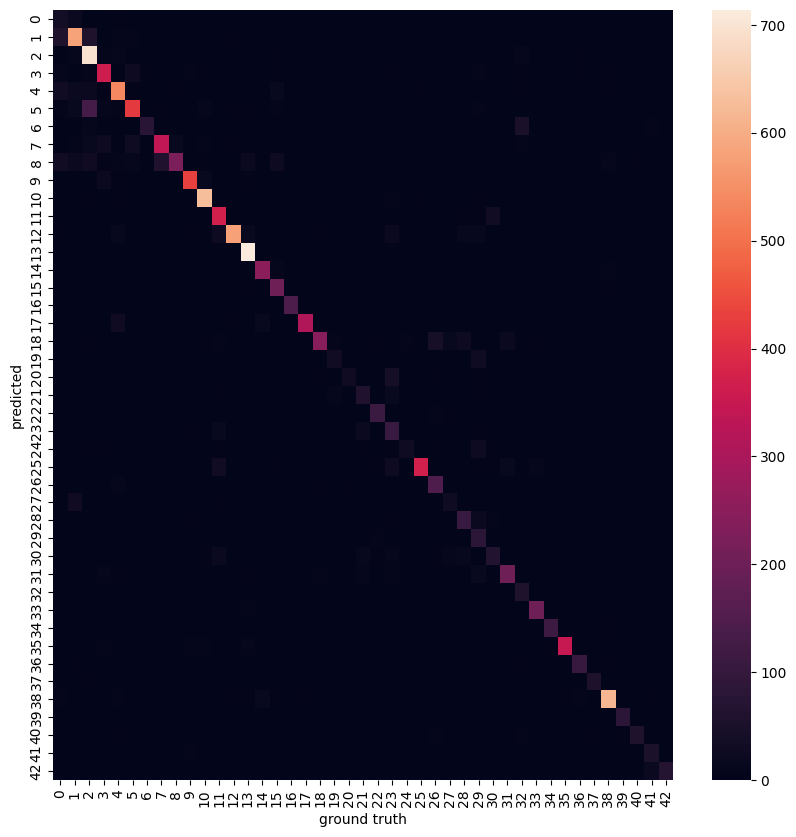

In [111]:
from sklearn.metrics import confusion_matrix

print(test)
print(pred)

cf = confusion_matrix(test, pred)

import seaborn as sns
df_cm = pd.DataFrame(cf)

fig, ax = plt.subplots(figsize = (10,10))
sns.heatmap(df_cm, annot=False, fmt="g", ax=ax)

ax.set_xlabel("ground truth")
ax.set_ylabel("predicted")




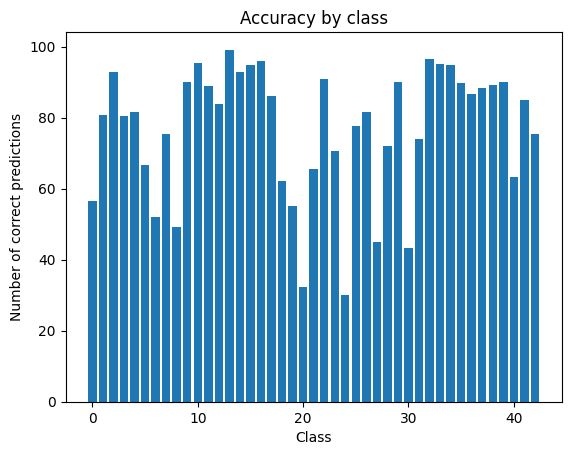

In [116]:
# Grafico de barras de acertos por classe
from sklearn.metrics import confusion_matrix

diagonal = np.diag(cf)
# Use the percentage of correct predictions
diagonal = diagonal/cf.sum(axis=1)*100
plt.bar(range(len(diagonal)), diagonal)
plt.xlabel('Class')
plt.ylabel('Number of correct predictions')
plt.title('Accuracy by class')
plt.show()